In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

## API call
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

### putting the data into a data frame
* instead of doing weather check for ach of the city, gather the dat into a list/dict...
* I want to try to retrive the data and put them into a data frame at the same process.
* using for loop with .iterrows()

In [19]:
weather_df = pd.DataFrame()
weather_df['Cities'] = cities
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Max Temp'] = ""
weather_df['Humidity'] = ""
weather_df['Cloudiness'] = ""
weather_df['Wind Speed'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""

In [20]:
counter = 0
weather_json = []

base_url = 'http://api.openweathermap.org/data/2.5/weather'


for index,row in weather_df.iterrows():
    city = row['Cities']
    params = {"q" : city, "appid" : weather_api_key, "units" : "imperial"}
    weather_response = requests.get(base_url, params=params).json()
    counter += 1
    print(f"Processing Record {counter} | {city}")
    
    time.sleep(1)
    try:
        weather_df.loc[index, "Lat"] = weather_response['coord']['lat']
        weather_df.loc[index, "Lng"] = weather_response['coord']['lon']
        weather_df.loc[index, "Max Temp"] = weather_response['main']['temp_max']
        weather_df.loc[index, "Humidity"] = weather_response['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = weather_response['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = weather_response['wind']['speed']
        weather_df.loc[index, 'Country'] = weather_response['sys']['country']
        weather_df.loc[index, "Date"] = weather_response['dt']
    except:
        print(f"ERROR! THERE IS NO INFO ABOUT {city}")

Processing Record 1 | tuatapere
Processing Record 2 | pilar
Processing Record 3 | hermanus
Processing Record 4 | harper
Processing Record 5 | hilo
Processing Record 6 | pevek
Processing Record 7 | kapaa
Processing Record 8 | sulphur
Processing Record 9 | tasiilaq
Processing Record 10 | meulaboh
Processing Record 11 | kaitangata
Processing Record 12 | puerto ayora
Processing Record 13 | tacuarembo
Processing Record 14 | vao
Processing Record 15 | saint-philippe
Processing Record 16 | port alfred
Processing Record 17 | mount gambier
Processing Record 18 | bethel
Processing Record 19 | bredasdorp
Processing Record 20 | boa vista
Processing Record 21 | cidreira
Processing Record 22 | yellowknife
Processing Record 23 | kununurra
Processing Record 24 | arlit
Processing Record 25 | clifton springs
Processing Record 26 | belushya guba
ERROR! THERE IS NO INFO ABOUT belushya guba
Processing Record 27 | geraldton
Processing Record 28 | constitucion
Processing Record 29 | rungata
ERROR! THERE IS N

Processing Record 224 | hambantota
Processing Record 225 | sola
Processing Record 226 | kahului
Processing Record 227 | coquimbo
Processing Record 228 | antofagasta
Processing Record 229 | sitka
Processing Record 230 | suntar
Processing Record 231 | pemangkat
Processing Record 232 | san vicente
Processing Record 233 | champerico
Processing Record 234 | ranong
Processing Record 235 | zhezkazgan
Processing Record 236 | phangnga
Processing Record 237 | yazd
Processing Record 238 | alenquer
Processing Record 239 | vallenar
Processing Record 240 | formoso do araguaia
ERROR! THERE IS NO INFO ABOUT formoso do araguaia
Processing Record 241 | east london
Processing Record 242 | isangel
Processing Record 243 | ribeira grande
Processing Record 244 | quatre cocos
Processing Record 245 | samalaeulu
ERROR! THERE IS NO INFO ABOUT samalaeulu
Processing Record 246 | matara
Processing Record 247 | nouakchott
Processing Record 248 | lompoc
Processing Record 249 | chippewa falls
Processing Record 250 | l

Processing Record 453 | semey
Processing Record 454 | florianopolis
Processing Record 455 | teeli
Processing Record 456 | mackay
Processing Record 457 | ancud
Processing Record 458 | moroni
Processing Record 459 | nantucket
Processing Record 460 | shuangyang
Processing Record 461 | jumla
Processing Record 462 | badia polesine
Processing Record 463 | bellmead
Processing Record 464 | szczecinek
Processing Record 465 | serenje
Processing Record 466 | alice springs
Processing Record 467 | praia
Processing Record 468 | tual
Processing Record 469 | tautira
Processing Record 470 | burnie
Processing Record 471 | negombo
Processing Record 472 | brighton
Processing Record 473 | namatanai
Processing Record 474 | inverell
Processing Record 475 | qaqortoq
Processing Record 476 | iracoubo
Processing Record 477 | goderich
Processing Record 478 | louisbourg
ERROR! THERE IS NO INFO ABOUT louisbourg
Processing Record 479 | waling
Processing Record 480 | pisco
Processing Record 481 | creel
Processing Rec

In [21]:
weather_df

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuatapere,-46.1333,167.6833,57.9,96,100,3.87,NZ,1635134887
1,pilar,-9.5972,-35.9567,75.13,91,38,4.76,BR,1635134619
2,hermanus,-34.4187,19.2345,52.9,80,0,9.42,ZA,1635134644
3,harper,4.375,-7.7169,77.27,84,100,7.49,LR,1635134356
4,hilo,19.7297,-155.09,73.8,91,90,5.75,US,1635134726
...,...,...,...,...,...,...,...,...,...
620,vilyuysk,63.7553,121.6247,33.69,90,99,4.54,RU,1635135756
621,soyo,-6.1349,12.3689,76.75,83,99,7.16,AO,1635135758
622,tres lagoas,-20.7511,-51.6783,65.86,95,100,2.86,BR,1635135724
623,shediac,46.2198,-64.5411,44.65,65,1,14.97,CA,1635135760


### clear out all the row that couldn't get data due to errors

In [22]:
#replace all the '' value (it's string type) by NaN
weather_df = weather_df.replace('', np.NaN)
#start dropping NaN value
weather_df = weather_df.dropna(axis=0, how="any")
weather_df.head(10)

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuatapere,-46.1333,167.6833,57.90,96.0,100.0,3.87,NZ,1.635135e+09
1,pilar,-9.5972,-35.9567,75.13,91.0,38.0,4.76,BR,1.635135e+09
2,hermanus,-34.4187,19.2345,52.90,80.0,0.0,9.42,ZA,1.635135e+09
3,harper,4.3750,-7.7169,77.27,84.0,100.0,7.49,LR,1.635134e+09
4,hilo,19.7297,-155.0900,73.80,91.0,90.0,5.75,US,1.635135e+09
5,pevek,69.7008,170.3133,6.71,93.0,100.0,5.17,RU,1.635135e+09
6,kapaa,22.0752,-159.3190,80.58,88.0,75.0,1.01,US,1.635135e+09
7,sulphur,30.2366,-93.3774,73.38,97.0,1.0,5.75,US,1.635135e+09
8,tasiilaq,65.6145,-37.6368,30.36,85.0,100.0,47.53,GL,1.635135e+09
9,meulaboh,4.1363,96.1285,83.10,69.0,89.0,2.93,ID,1.635135e+09


In [23]:
#It's pointless to get these stat calculation for Date, Lattitude and Longitude.
weather_df[['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].describe()

,Max Temp,Humidity,Cloudiness,Wind Speed
count,580.000000,580.000000,580.000000,580.000000
mean,59.483983,73.267241,57.098276,7.714845
std,20.759629,19.333612,39.637986,5.628415
min,-15.210000,14.000000,0.000000,0.000000
25%,44.995000,65.000000,11.000000,3.320000
50%,62.355000,76.000000,73.000000,6.645000
75%,77.275000,88.000000,96.000000,10.780000
max,97.120000,100.000000,100.000000,47.530000


In [24]:
#Check if there are places that have the humidity >100%
weather_df.loc[weather_df['Humidity'] > 100]
#There is no places in the DF had the humidity >100%

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### There is no places in the data frame that have the humidity > 100%

#### Save the weather_df to csv file for part 2

In [25]:
weather_df.to_csv(output_data_file)

# Plotting data

### Latitude vs Max Temp

<AxesSubplot:title={'center':'City Latitide vs Max Temperature'}, xlabel='Lat', ylabel='Max Temp'>

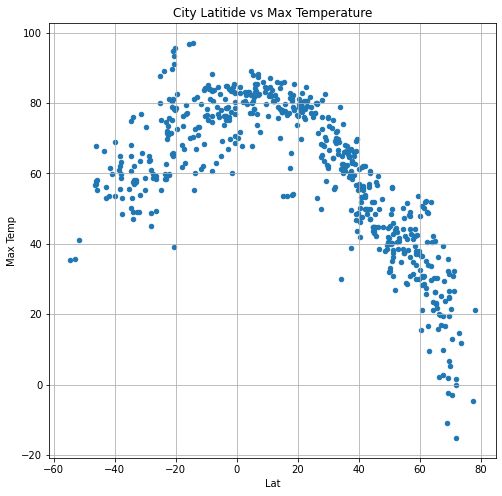

In [26]:
weather_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                title="City Latitide vs Max Temperature", figsize=(8,8))

### Latitude vs Humidity

<AxesSubplot:title={'center':'City Latitide vs Humidity'}, xlabel='Lat', ylabel='Humidity'>

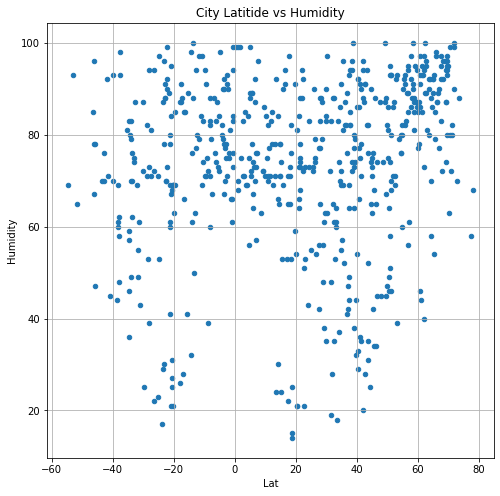

In [27]:
weather_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                title="City Latitide vs Humidity", figsize=(8,8))

### Latitude vs Cloudiness

<AxesSubplot:title={'center':'City Latitide vs Cloudiness'}, xlabel='Lat', ylabel='Cloudiness'>

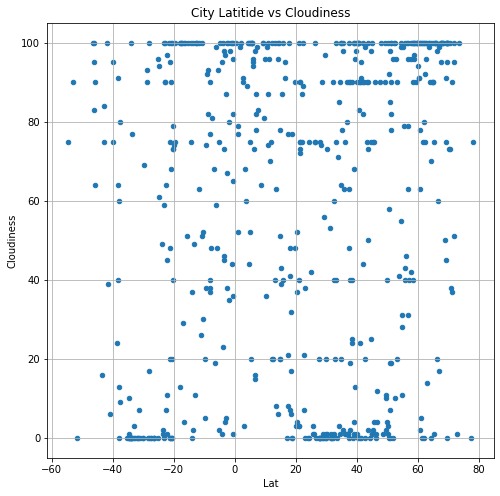

In [28]:
weather_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                title="City Latitide vs Cloudiness", figsize=(8,8))

### Latitude vs Wind Speed

<AxesSubplot:title={'center':'City Latitide vs Wind Speed'}, xlabel='Lat', ylabel='Wind Speed'>

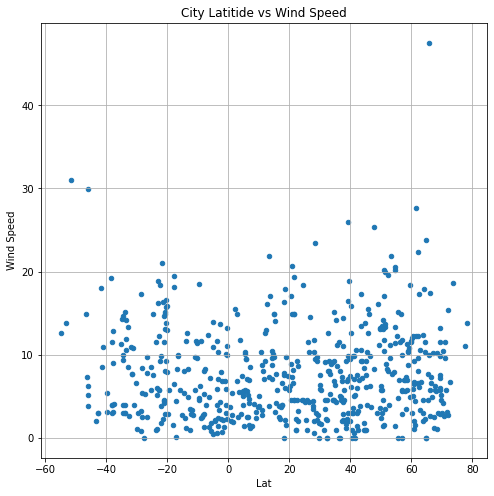

In [29]:
weather_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                title="City Latitide vs Wind Speed", figsize=(8,8))

## Oservation about the relation between Latitude other variables:
1. There is a relation between the Latitude and the highest temperature: as the latitude gets close to the equator, the heat increase.
2. Humidity, Cloudiness, and Wind Speed seem to have no relationship with Latitude

#  Linear Regression

In [30]:
northern_hem_df = weather_df.loc[weather_df["Lat"] > 0]
southern_hem_df = weather_df.loc[weather_df["Lat"] < 0]
southern_hem_df

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuatapere,-46.1333,167.6833,57.90,96.0,100.0,3.87,NZ,1.635135e+09
1,pilar,-9.5972,-35.9567,75.13,91.0,38.0,4.76,BR,1.635135e+09
2,hermanus,-34.4187,19.2345,52.90,80.0,0.0,9.42,ZA,1.635135e+09
10,kaitangata,-46.2817,169.8464,57.04,78.0,83.0,7.34,NZ,1.635135e+09
11,puerto ayora,-0.7393,-90.3518,68.56,94.0,96.0,4.00,EC,1.635135e+09
...,...,...,...,...,...,...,...,...,...
603,nortelandia,-14.4547,-56.8028,70.29,98.0,100.0,5.39,BR,1.635136e+09
613,urucara,-2.5364,-57.7600,75.29,93.0,67.0,2.26,BR,1.635136e+09
617,parana,-31.7320,-60.5238,63.52,55.0,0.0,7.74,AR,1.635136e+09
621,soyo,-6.1349,12.3689,76.75,83.0,99.0,7.16,AO,1.635136e+09


### 1--Northern Hemisphere Latitude and Max Temperature (Fahrenheit)

the r value: -0.904821


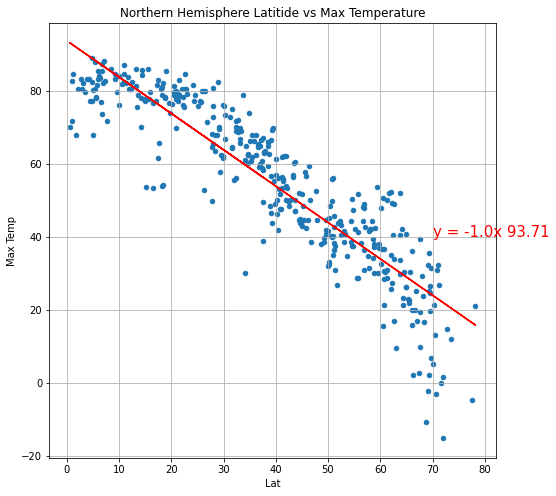

In [31]:
(slope, intercept, r_value, p_value, stderr)= linregress(northern_hem_df.Lat, northern_hem_df['Max Temp'])

#set the regression equation to graph the line y = ax + b
regression_value = northern_hem_df.Lat * slope + intercept
#print out equ on the graph
line_equ = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                title="Northern Hemisphere Latitide vs Max Temperature", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value, "r")
plt.annotate(line_equ, (70,40),color="r", fontsize=15)
print(f"the r value: {round(r_value, 6)}")

### 2--Southern Hem and Max Temp (Fahrenheit)

the r value: 0.639347


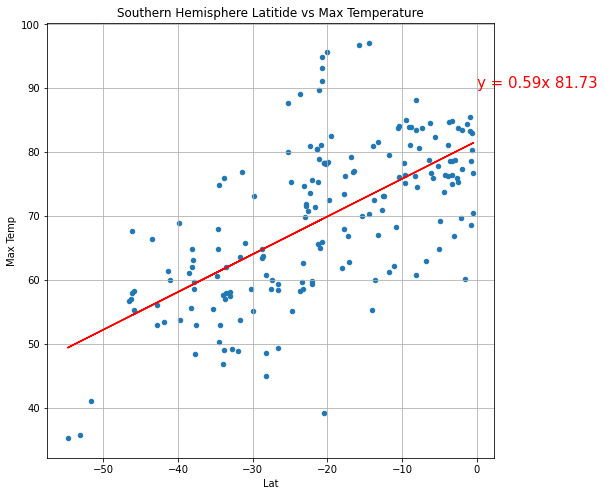

In [32]:
(slope2, intercept2, r_value2, p_value2, stderr2)= linregress(southern_hem_df.Lat, southern_hem_df['Max Temp'])

#set the regression equation to graph the line y = ax + b
regression_value2 = southern_hem_df.Lat * slope2 + intercept2
#print out equ on the graph
line_equ2 = "y = " + str(round(slope2, 2)) + "x " + str(round(intercept2,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                title="Southern Hemisphere Latitide vs Max Temperature", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value2, "r")
plt.annotate(line_equ2, (0,90),color="r", fontsize=15)
print(f"the r value: {round(r_value2, 6)}")

### 3--Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r value: 0.237065


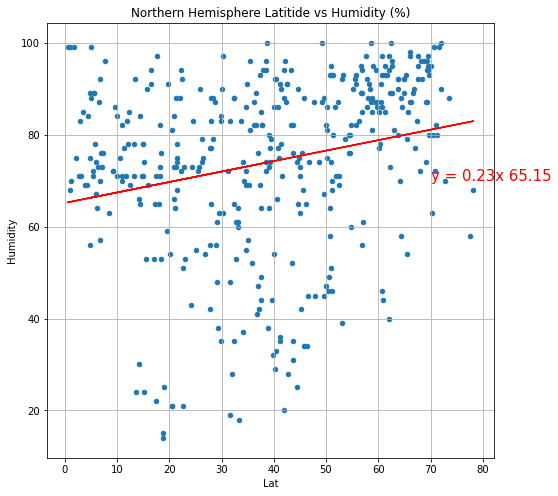

In [33]:
(slope3, intercept3, r_value3, p_value3, stderr3)= linregress(northern_hem_df.Lat, northern_hem_df.Humidity)

#set the regression equation to graph the line y = ax + b
regression_value3 = northern_hem_df.Lat * slope3 + intercept3
#print out equ on the graph
line_equ3 = "y = " + str(round(slope3, 2)) + "x " + str(round(intercept3,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                title="Northern Hemisphere Latitide vs Humidity (%)", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value3, "r")
plt.annotate(line_equ3, (70,70),color="r", fontsize=15)
print(f"the r value: {round(r_value3, 6)}")

### 4--Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r value: 0.192165


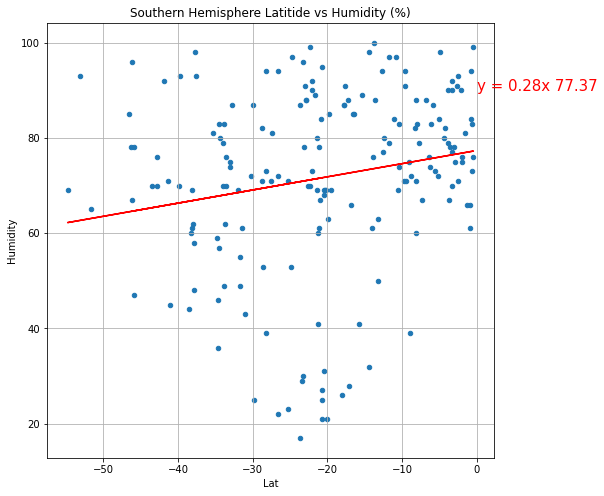

In [34]:
(slope4, intercept4, r_value4, p_value4, stderr4)= linregress(southern_hem_df.Lat, southern_hem_df['Humidity'])

#set the regression equation to graph the line y = ax + b
regression_value4 = southern_hem_df.Lat * slope4 + intercept4
#print out equ on the graph
line_equ4 = "y = " + str(round(slope4, 2)) + "x " + str(round(intercept4,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                title="Southern Hemisphere Latitide vs Humidity (%)", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value4, "r")
plt.annotate(line_equ4, (0,90),color="r", fontsize=15)
print(f"the r value: {round(r_value4, 6)}")

### 5-- Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r value: 0.118254


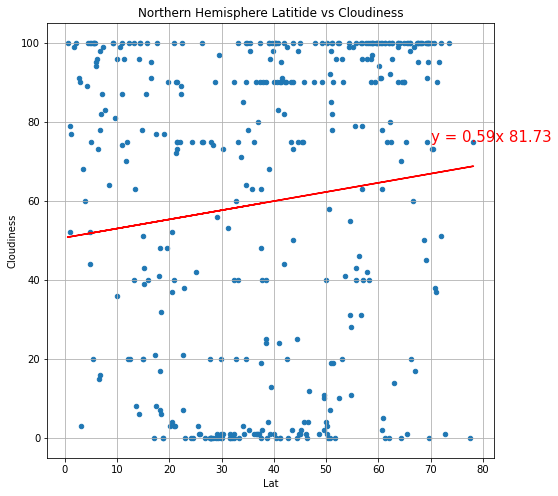

In [35]:
(slope5, intercept5, r_value5, p_value5, stderr5)= linregress(northern_hem_df.Lat, northern_hem_df['Cloudiness'])

#set the regression equation to graph the line y = ax + b
regression_value5 = northern_hem_df.Lat * slope5 + intercept5
#print out equ on the graph
line_equ5 = "y = " + str(round(slope5, 2)) + "x " + str(round(intercept5,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                title="Northern Hemisphere Latitide vs Cloudiness", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value5, "r")
plt.annotate(line_equ2, (70,75),color="r", fontsize=15)
print(f"the r value: {round(r_value5, 6)}")

### 6--Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r value: 0.207941


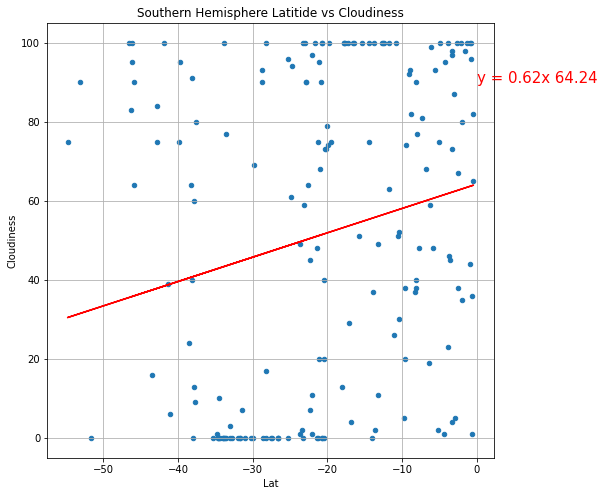

In [36]:
(slope6, intercept6, r_value6, p_value6, stderr6)= linregress(southern_hem_df.Lat, southern_hem_df['Cloudiness'])

#set the regression equation to graph the line y = ax + b
regression_value6 = southern_hem_df.Lat * slope6 + intercept6
#print out equ on the graph
line_equ6 = "y = " + str(round(slope6, 2)) + "x " + str(round(intercept6,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                title="Southern Hemisphere Latitide vs Cloudiness", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value6, "r")
plt.annotate(line_equ6, (0,90),color="r", fontsize=15)
print(f"the r value: {round(r_value6, 6)}")

### 7--Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r value: 0.133833


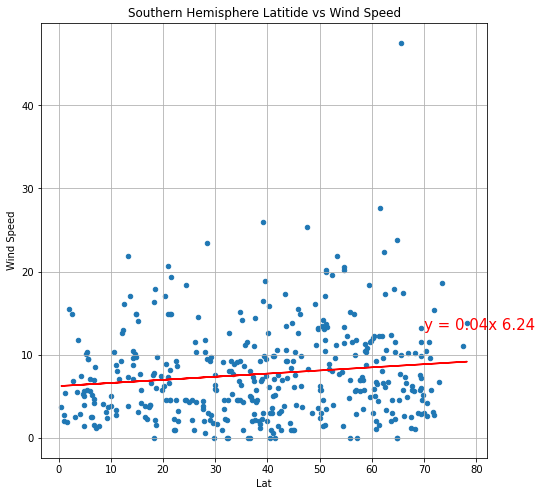

In [37]:
(slope7, intercept7, r_value7, p_value7, stderr7)= linregress(northern_hem_df.Lat, northern_hem_df['Wind Speed'])

#set the regression equation to graph the line y = ax + b
regression_value7 = northern_hem_df.Lat * slope7 + intercept7
#print out equ on the graph
line_equ7 = "y = " + str(round(slope7, 2)) + "x " + str(round(intercept7,2))
northern_hem_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                title="Southern Hemisphere Latitide vs Wind Speed", figsize=(8,8))
plt.plot(northern_hem_df.Lat, regression_value7, "r")
plt.annotate(line_equ7, (70,13),color="r", fontsize=15)
print(f"the r value: {round(r_value7, 6)}")

### 8-- Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r value: -0.247804


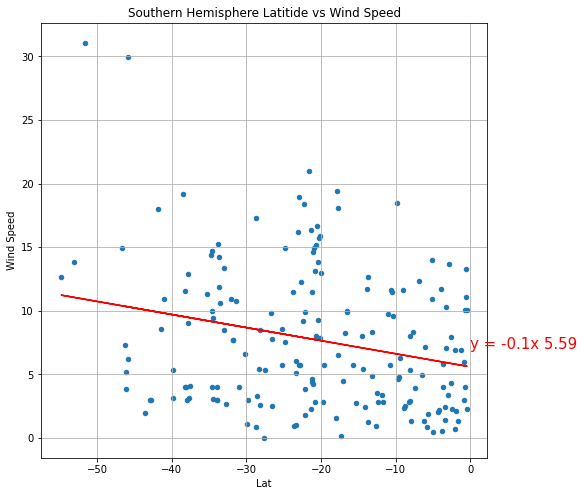

In [38]:
(slope8, intercept8, r_value8, p_value8, stderr8)= linregress(southern_hem_df.Lat, southern_hem_df['Wind Speed'])

#set the regression equation to graph the line y = ax + b
regression_value8 = southern_hem_df.Lat * slope8 + intercept8
#print out equ on the graph
line_equ8 = "y = " + str(round(slope8, 2)) + "x " + str(round(intercept8,2))
southern_hem_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                title="Southern Hemisphere Latitide vs Wind Speed", figsize=(8,8))
plt.plot(southern_hem_df.Lat, regression_value8, "r")
plt.annotate(line_equ8, (0,7),color="r", fontsize=15)
print(f"the r value: {round(r_value8, 6)}")

## making function to graph (BONUS)

In [39]:
def scater_regress(frame, x_column, y_column):
    
    (slope, intercept, r_value, p_value, stderr)= linregress(x_column, y_column)

    #set the regression equation to graph the line y = ax + b
    regression_value = x_column * slope + intercept
    #print out equ on the graph
    line_equ = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
    plt.figure(figsize=(8,8))
    plt.scatter(x_column, y_column)
    plt.plot(x_column, regression_value, "r")
    plt.annotate(line_equ, (70,40),color="r", fontsize=15)
    print(f"the r value: {round(r_value, 6)}")

the r value: -0.904821


Text(0.5, 1.0, 'Northern Hemisphere Max Temperature')

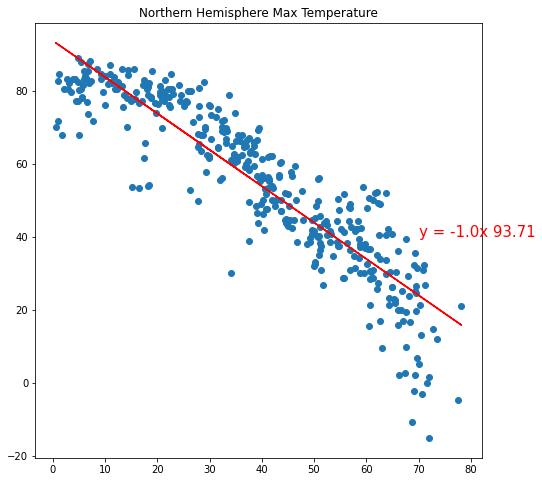

In [40]:
#Successfully functionalize the graphing codes.
#But, I have limitations. With function I have to use plt.scatter
#While manually code out every single block give me ability to customize the graph within the df.plot()

scater_regress(northern_hem_df, northern_hem_df.Lat, northern_hem_df['Max Temp'])
plt.title("Northern Hemisphere Max Temperature")

the r value: 0.192165


Text(0.5, 1.0, 'Soutern Hemisphere Humidity(%)')

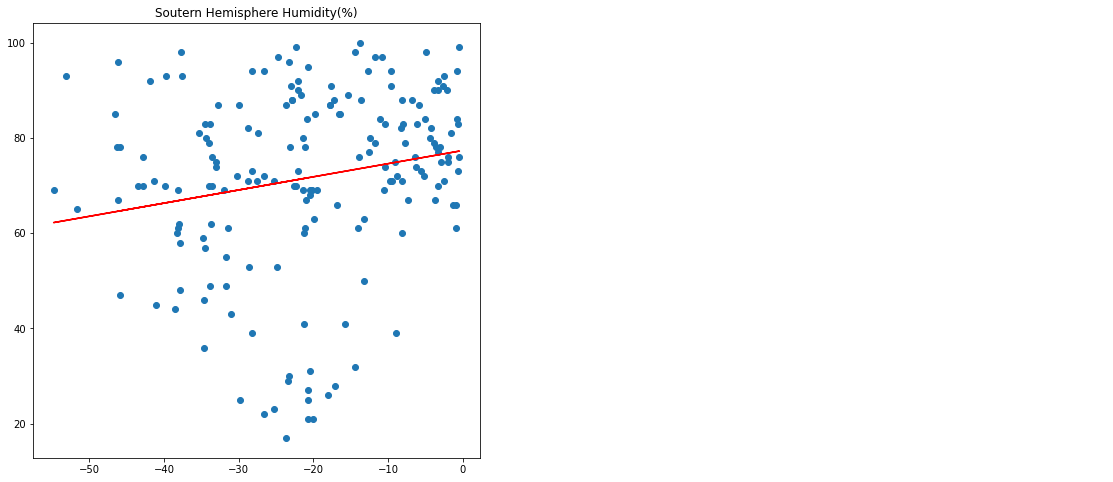

In [41]:
scater_regress(southern_hem_df, southern_hem_df.Lat, southern_hem_df.Humidity)
plt.title('Soutern Hemisphere Humidity(%)')

## More in-deep observations (with regression lines)
1. Seperate the data into 2 hemisphere, it shows that there is strong positive correlation of Latitude and temperature in Southern Hemisphere (r = 0.64); it also shows a strong negative correlation those two variables in Northern Hemisphere (r = -0.9)
2. All other varibles have very weak correlation with Latitude